In [ ]:
!ln -s DALL_E/dall_e dall_e

ln: failed to create symbolic link 'dall_e/dall_e': File exists


In [ ]:
from dall_e          import map_pixels, unmap_pixels, load_model

In [ ]:
import torch
from PIL import Image
from pathlib import Path
from fastai.basics import *
from fastai.vision.data import *
from fastai.vision.all import *
from fastai.text.all import *

In [ ]:
path=Path('./danbooru2020')
image_path=path/'512px/'
meta=path/'meta'

In [ ]:
#with open('named_tags.pkl','rb') as f: named_tags=pickle.load(f)
#with open('id_tags.pkl','rb') as f: id_tags=pickle.load(f)
#full_table = pd.read_pickle('fulll_table.pkl')

In [ ]:
import io
import os, sys
import requests
import PIL

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF

from dall_e          import map_pixels, unmap_pixels, load_model
from IPython.display import display, display_markdown

target_image_size = 256

def download_image(url):
    resp = requests.get(url)
    resp.raise_for_status()
    return PIL.Image.open(io.BytesIO(resp.content))

def preprocess(img):
    s = min(img.size)
    
    if s < target_image_size:
        raise ValueError(f'min dim for image {s} < {target_image_size}')
        
    r = target_image_size / s
    s = (round(r * img.size[1]), round(r * img.size[0]))
    img = TF.resize(img, s, interpolation=PIL.Image.LANCZOS)
    img = TF.center_crop(img, output_size=2 * [target_image_size])
    img = torch.unsqueeze(T.ToTensor()(img), 0)
    return map_pixels(img)

In [ ]:
# This can be changed to a GPU, e.g. 'cuda:0'.
dev = torch.device('cpu')

# For faster load times, download these files locally and use the local paths instead.
enc = load_model("https://cdn.openai.com/dall-e/encoder.pkl", dev)
dec = load_model("https://cdn.openai.com/dall-e/decoder.pkl", dev)

/home/molly/miniconda3/envs/fastai/lib/python3.8/site-packages/torchvision/transforms/functional.py:386: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


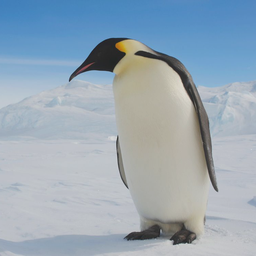

In [ ]:
x = preprocess(download_image('https://assets.bwbx.io/images/users/iqjWHBFdfxIU/iKIWgaiJUtss/v2/1000x-1.jpg'))
display_markdown('Original image:')
display(T.ToPILImage(mode='RGB')(x[0]))

/home/molly/miniconda3/envs/fastai/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([1, 32, 32]) tensor([[[7522,  741, 5973,  ...,  629, 3844, 4695],
         [ 782, 7459, 6832,  ..., 6913, 5215, 4537],
         [1580, 4066, 5768,  ..., 5677,  224, 2913],
         ...,
         [6694, 7130, 5047,  ..., 6027, 5770,  278],
         [4898, 5659,  732,  ..., 3833, 6476, 4461],
         [3791, 3243, 5504,  ..., 5016, 1144, 1005]]])


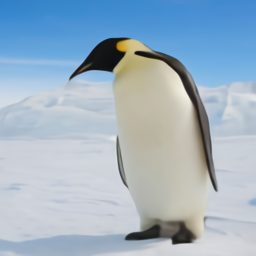

In [ ]:
import torch.nn.functional as F

z_logits = enc(x)
z = torch.argmax(z_logits, axis=1)
print(z.shape,z)
z = F.one_hot(z, num_classes=enc.vocab_size).permute(0, 3, 1, 2).float()

x_stats = dec(z).float()
x_rec = unmap_pixels(torch.sigmoid(x_stats[:, :3]))
x_rec = T.ToPILImage(mode='RGB')(x_rec[0])

display_markdown('Reconstructed image:')
display(x_rec)

In [ ]:
dec??

In [ ]:
load_model??

In [ ]:
Conv2d??

Object `Conv2d` not found.


In [ ]:
z_logits.shape

torch.Size([1, 8192, 32, 32])

In [ ]:
torch.argmax(z_logits, axis=1).max()

tensor(8170)

In [ ]:
z_logits.shape

torch.Size([1, 8192, 32, 32])

In [ ]:
z.shape

torch.Size([1, 8192, 32, 32])

In [ ]:
z_logits.shape

torch.Size([1, 8192, 32, 32])

In [ ]:
torch.argmax(z_logits, axis=1).flatten(1).shape

torch.Size([1, 1024])